## 8.1 성능 최적화
### 1) 데이터를 사용한 성능 최적화
- 최대한 많은 데이터 수집하기
- 데이터 생성하기
- 데이터 범위 조정하기

### 2) 알고리즘을 이용한 성능 최적화
- 유사한 용도의 알고리즘들을 선택하여 모델을 훈련시키고 최적의 성능을 보이는 알고리즘 선택

### 3) 알고리즘 튜닝을 위한 성능 최적화
: 모델을 하나 선택하여 훈련시키려면 다양한 하이퍼파라미터를 변경하면서 훈련시키고 최적의 성능을 도출해야함
- 선택할 수 있는 하이퍼파라미터
- 진단 :: 모델이 과적합인지 아니면 다른 원인으로 성능향상에 문제가 있는지에 대한 인사이트제공
    - 훈련 성능이 검증 성능보다 눈에 띄게 좋으면 과적합 의심 -> 규제화 진행
    - 훈련과 검증성능 둘 다 안좋으면 과소적합 의심 -> 에포크 수 조정
    - 훈련 성능이 검증성능을 넘어서는 변곡점이 있다면 조기 종료
- 가중치 :: 초깃값은 작은 난수 사용. 오토인코더같은 비지도 학습을 이용하여 사전훈련 진행 후 지도학습을 진행하기도 함
- 학습률 :: 네트워크 계층이 많다면 학습률은 높아야하고 계층이 적으면 학습률은 작아야함
- 활성화 함수 :: 활성화함수를 변경하려면 손실함수도 같이 변경해야함. 일반적으로 시그모이드or tanh를 쓰고 출력으로 소프트맥스, 시그모이드 사용
- 배치와 에포크 :: 일반적으로 큰 에포크와 작은 배치를 사용하는 것이 트렌드
    - 적절한 배치 크기를 위해 훈련 데이터셋의 크기와 동일하게 하거나 하나의 배치로 훈련을 시켜보는 등 테스트를 진행
- 옵티마이저 및 손실 함수 :: 일반적으로 SGD 사용. 네트워크 구성에 따라 아담이나 RMSProp 등도 성능을 모임
- 네트워크 구성 :: 네트워크 토폴로지라고도 한다. 예를 들어 하나의 은닉층에 뉴런을 여러개 포함시키거나(넓은 네트워크) 네트워크 계층을 늘리되 뉴런 개수를 줄임(긴 네트워크)

### 4) 앙상블을 이용한 성능 최적화
:: 모델을 두 개 이상 섞어서 사용

## 8.2 하드웨어를 이용한 성능 최적화
### 1) CPU와 GPU 사용의 차이
- CPU는 연산을 담당하는 ALU와 명령어를 해석하고 실행하는 컨트롤, 데이터를 담아두는 캐시로 구성
    - 즉 명령어 입력 순서대로 데이터 처리
    - 산술논리장치인 ALU가 많이 필요 없음
- GPU는 병렬처리를 위해 개발
    - 캐시 메모리 비중은 낮고 연산수행 ALU는 증가
    -  하나의 코어에 수백 수천개의 ALU 장착
=> 개별 코어 속도는 CPU가 훨씬 빠르나 병렬에선 GPU가 압도적
    - 직렬 : 행렬연산을 많이 쓰는 재귀연산 (파이썬, 매트랩)
    - 병렬 : 역전파와 같은 미적분

### 2) GPU를 이용한 성능 최적화
- CUDA : NVIDIA에서 개발한 GPU 개발 툴

## 8.3 하이퍼파라미터를 이용한 성능 최적화
### 1) 배치정규화
- 정규화 :: 데이터 범위를 사용자가 원하는 범위로 제한 (MinMaxscaler())
- 규제화 :: 모델의 복잡도를 주기 위해 제약을 두는 방법
    - 드롭아웃, 조기종료
- 표준화 :: 기존데이터를 평균은 0, 표준편차는 1인 형태의 데이터로 만드는 방법
- 배치정규화 :: 기울기 소별이나 기울기 폭말 문제 해결
    - 기울기 소멸/폭발의 원인은 내부 공변량 변화
        - 네트워크의 각 층마다 활성화함수가 적용되면서 입력 값들의 분포가 계속 바뀌는 현상
    - 따라서 표준화와 유사한 방식을 미니배치에 적용하여 평균은 0, 표준편차를 1로 유지
    - 장점 : 속도 향상
    - 단점 : 배치 크기가 작을때는 기존 값과 다른방향으로 훈련, RNN은 모델이 더 복잡해지면서 비요휼적

### 2) 드롭아웃을 위한 성능 최적화
:: 훈련할 때 일정 비율의 뉴런만 사용

In [2]:
!pip install torchvision

In [2]:
#1 라이브러리 호출
import torch
import matplotlib.pyplot as plt
import numpy as np

import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.optim as optim

In [3]:
trainset = torchvision.datasets.FashionMNIST(root='../data/', train=True, download=True, transform=transforms.ToTensor())

In [4]:
#데이터셋을 메모리로 가져오기
batch_size = 4
trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle=True)

In [5]:
#데이터셋 분리
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(images[0].shape)
print(labels[0].item())

torch.Size([4, 1, 28, 28])
torch.Size([1, 28, 28])
5


In [6]:
#5. 이미지 데이터를 출력하기 위한 전처리
def imshow(img, title):
    plt.figure(figsize=(batch_size * 4,4)) #출력할 개별 이미지의 크기 지정
    plt.axis('off')
    plt.imshow(np.transpose(img,(1,2,0))) #기본적으로 파이토치는 이미지 데이터셋을 [배치크기, 채널, 너비, 높이]순으로 저장. 하지만 이를 matplotlib으로 출력하려면 이미지가 [너비,높이,채널]형태여야함. 즉 데이터의 변경이 필요
    plt.show()

In [7]:
#6. 이미지 데이터 출력 함수
def show_batch_images(dataloader):
    images, labels = next(iter(dataloader)) #이미지의 크기
    
    img = torchvision.utils.make_grid(images)
    imshow(img, title=[str(x.item()) for x in labels])
    
    return images, labels

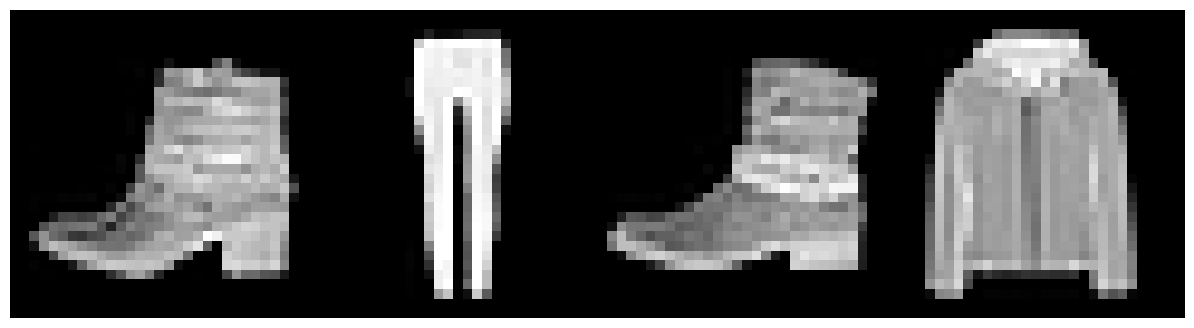

In [8]:
#7. 이미지 출력
images, labels = show_batch_images(trainloader)

In [20]:
#8 배치 정규화가 적용되지 않은 네트워크
class NormalNet(nn.Module):
    def __init__(self):
        super(NormalNet, self).__init__()
        self.classifier = nn.Sequential(
        nn.Linear(784,48),
        nn.ReLU(),
        nn.Linear(48,24),
        nn.ReLU(),
        nn.Linear(24,10) #FashionMNIST의 클래스는 총 열 개
        )
        
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.classifier(x) #nn.Sequential에서 정의한 호출
        return x

In [22]:
#9. 배치 정규화가 포함된 네트워크
class BNNet(nn.Module):
    def __init__(self):
        super(BNNet, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(784,48),
            nn.BatchNorm1d(48),
            nn.ReLU(),
            nn.Linear(48,24),
            nn.BatchNorm1d(24),
            nn.ReLU(),
            nn.Linear(24,10)
        )
        
    def forward(self,x):
        x = x.view(x.size(0),-1)
        x = self.classifier(x)
        return x

In [23]:
#10 배치정규화가 적용되지 않은 모델 선언
model = NormalNet()
print(model)

NormalNet(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=48, bias=True)
    (1): ReLU()
    (2): Linear(in_features=48, out_features=24, bias=True)
    (3): ReLU()
    (4): Linear(in_features=24, out_features=10, bias=True)
  )
)


In [24]:
model_bn = BNNet()
print(model_bn)

BNNet(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=48, bias=True)
    (1): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=48, out_features=24, bias=True)
    (4): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=24, out_features=10, bias=True)
  )
)


In [25]:
#12 데이터셋 메모리로 불러오기
batch_size = 512
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

In [26]:
#13 옵티마이저, 손실함수 지정
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(model.parameters(), lr=0.01)
opt_bn = optim.SGD(model_bn.parameters(), lr=0.01)

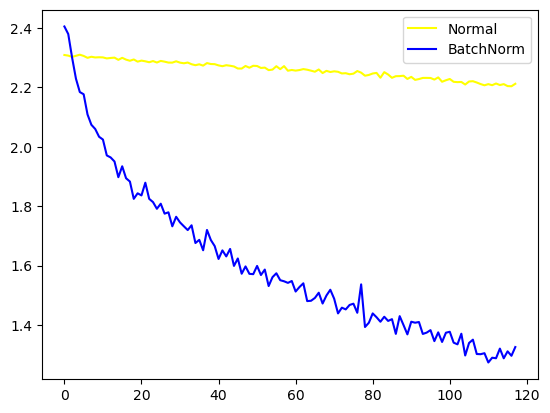

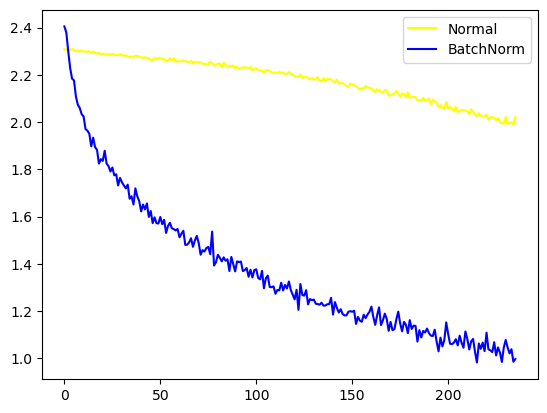

In [27]:
#14 모델학습
loss_arr = []
loss_bn_arr =[]
max_epochs = 2

for epoch in range(max_epochs):
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        opt.zero_grad() #배치 정규화가 적용되지 않은 모델의 학습
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        opt_bn.zero_grad() #배치정규화가 적용된 모델의 학습
        outputs_bn = model_bn(inputs)
        loss_bn = loss_fn(outputs_bn,labels)
        loss_bn.backward()
        opt_bn.step()
        
        loss_arr.append(loss.item())
        loss_bn_arr.append(loss_bn.item())
        
    plt.plot(loss_arr, 'yellow', label='Normal')
    plt.plot(loss_bn_arr, 'blue', label='BatchNorm')
    plt.legend()
    plt.show()

In [28]:
#15 데이터셋의 분포를 출력하기 위한 전처리
N = 50
noise = 0.3

x_train = torch.unsqueeze(torch.linspace(-1,1,N),1) #훈련데이터셋이 -1~1의 값을 갖도록 조정
y_train = x_train + noise * torch.normal(torch.zeros(N,1), torch.ones(N,1)) #훈련 데이터셋 값의 범위가 정규분포를 갖도록 조정

x_test = torch.unsqueeze(torch.linspace(-1,1,N),1)
y_test = x_test + noise*torch.normal(torch.zeros(N,1), torch.ones(N,1))

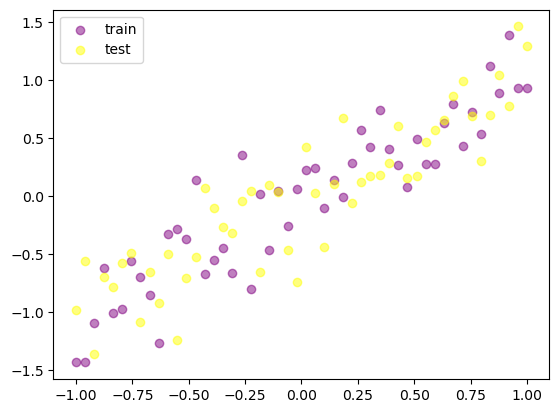

In [29]:
#16 데이터 분포를 그래프로 출력
plt.scatter(x_train.data.numpy(), y_train.data.numpy(), c='purple', alpha=0.5, label='train')
plt.scatter(x_test.data.numpy(), y_test.data.numpy(), c='yellow', alpha=0.5, label='test')
plt.legend()
plt.show()

In [31]:
#17 드롭아웃을 위한 모델 생성
N_h = 100
model = torch.nn.Sequential(
    torch.nn.Linear(1,N_h),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, N_h),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, 1),
) #드롭아웃이 적용되지 않은 모델

model_dropout = torch.nn.Sequential(
    torch.nn.Linear(1,N_h),
    torch.nn.Dropout(0.2), #드롭아웃 적용
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, N_h),
    torch.nn.Dropout(0.2),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h,1),
) #드롭아웃이 적용된 모델


In [35]:
#18 옵티마이저와 손실함수 지정
opt = torch.optim.Adam(model.parameters(), lr=0.01)
opt_dropout = torch.optim.Adam(model_dropout.parameters(), lr=0.01)
loss_fn = torch.nn.MSELoss()

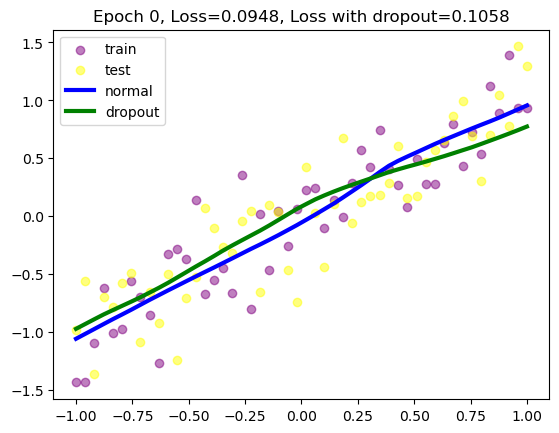

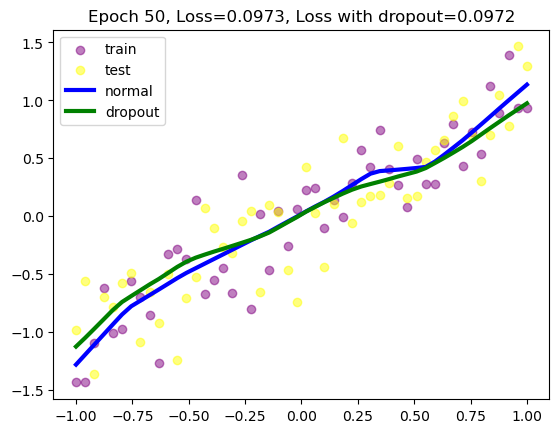

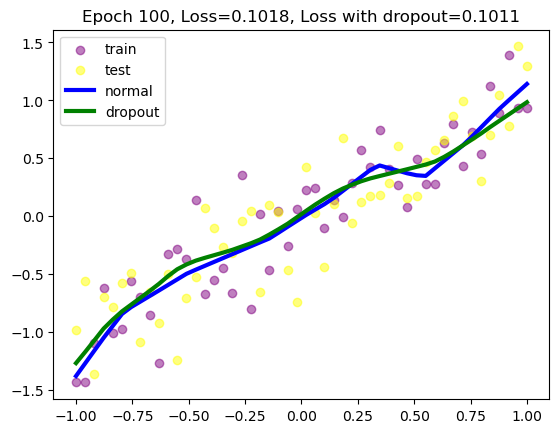

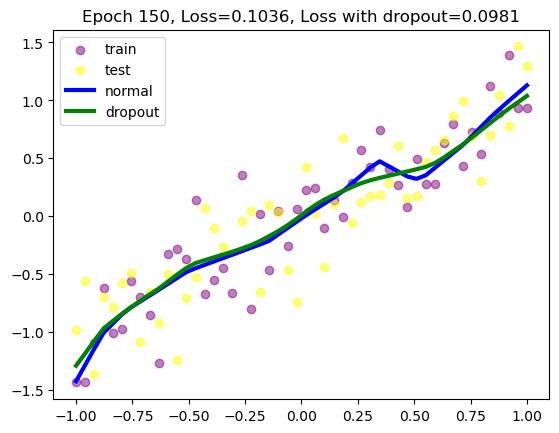

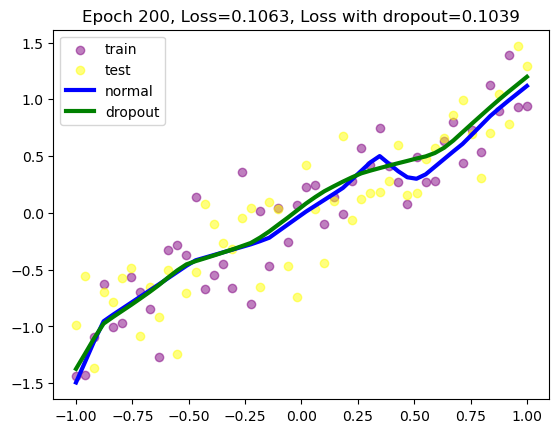

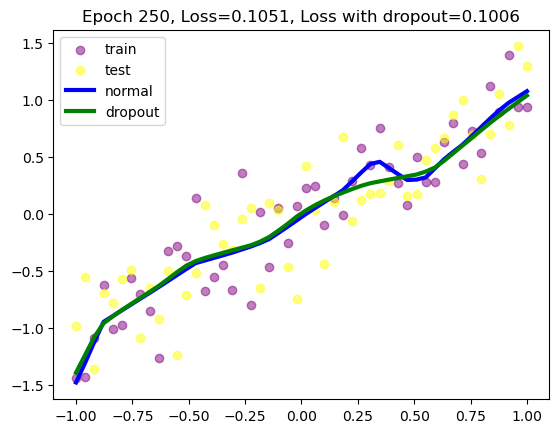

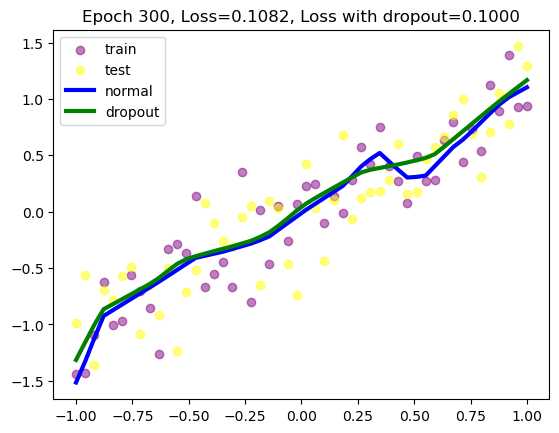

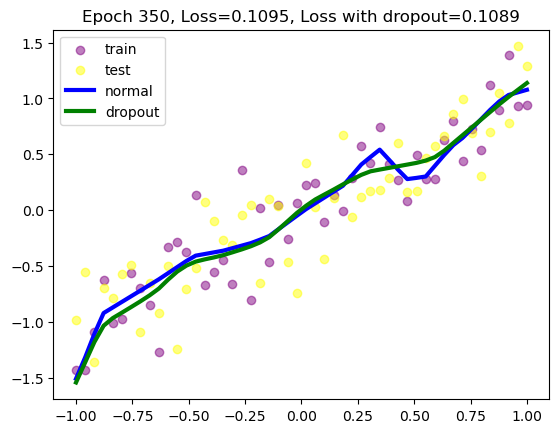

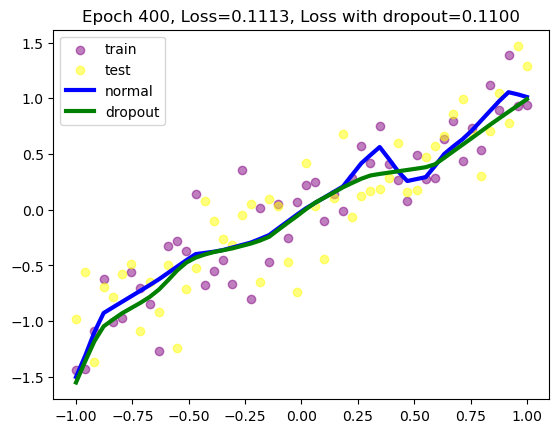

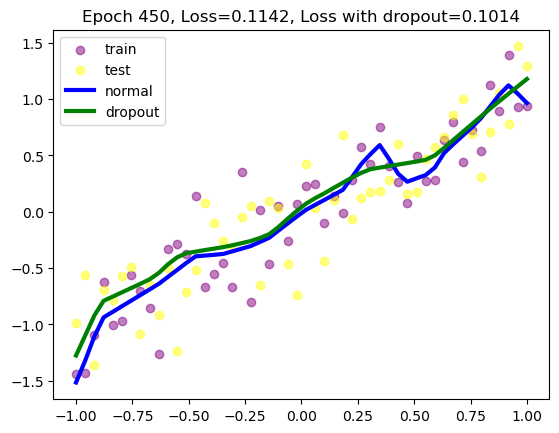

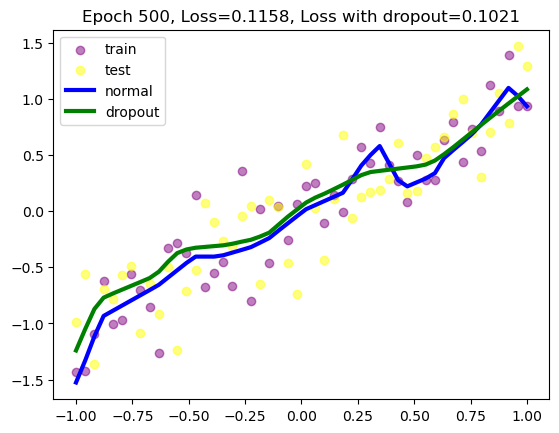

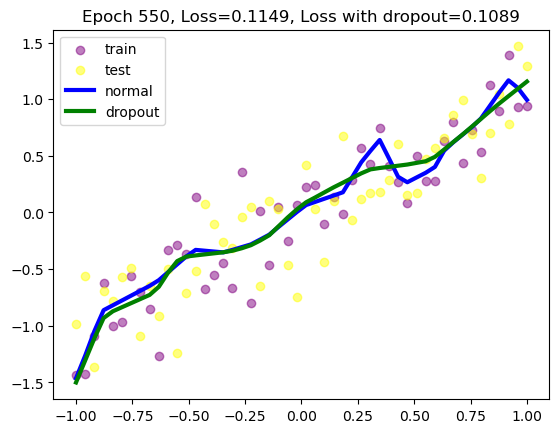

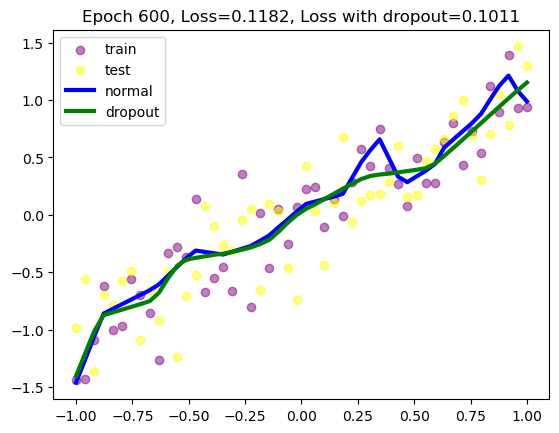

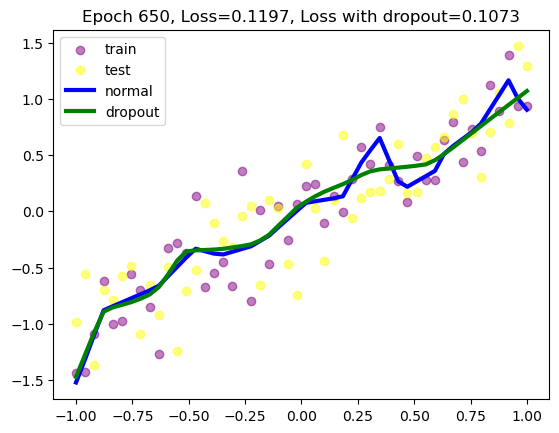

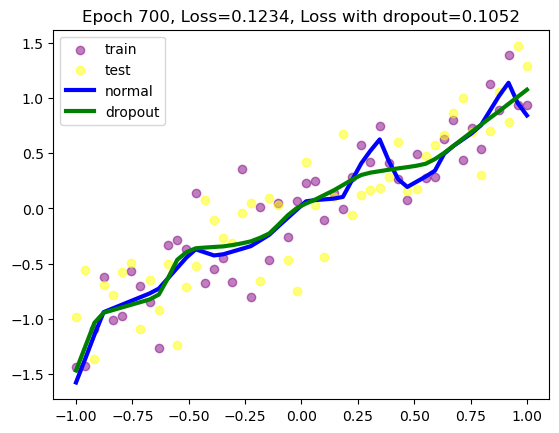

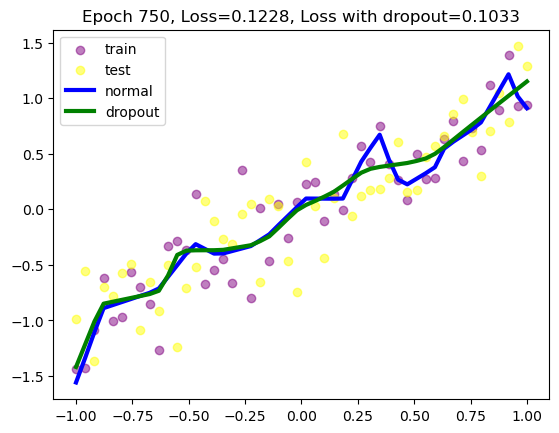

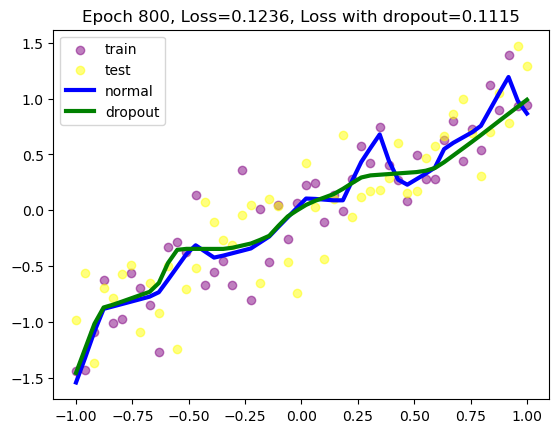

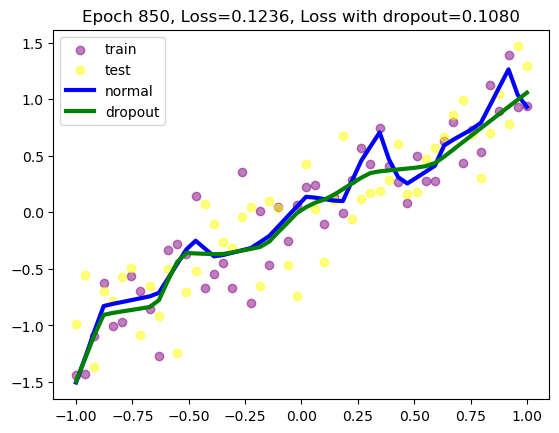

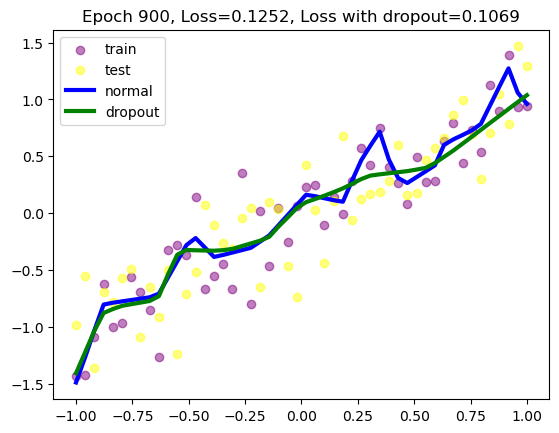

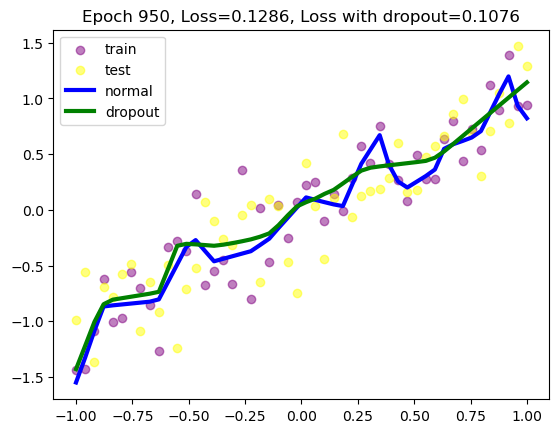

In [42]:
#19 모델학습
max_epochs = 1000
for epoch in range(max_epochs):
    pred = model(x_train) #드롭아웃이 적용되지 않은 모덱 학습
    loss = loss_fn(pred, y_train)
    opt.zero_grad()
    loss.backward()
    opt.step()
    
    pred_dropout = model_dropout(x_train) #드롭아웃이 적용된 모델 학습
    loss_dropout = loss_fn(pred_dropout, y_train)
    opt_dropout.zero_grad()
    loss_dropout.backward()
    opt_dropout.step()
    
    if epoch % 50 == 0: 
        model.eval()
        model_dropout.eval()
        
        test_pred = model(x_test)
        test_loss = loss_fn(test_pred, y_test)
        
        test_pred_dropout = model_dropout(x_test)
        test_loss_dropout = loss_fn(test_pred_dropout, y_test)
        
        plt.scatter(x_train.data.numpy(), y_train.data.numpy(), c='purple', alpha=0.5, label = 'train')
        plt.scatter(x_test.data.numpy(), y_test.data.numpy(), c='yellow', alpha=0.5, label='test')
        plt.plot(x_test.data.numpy(), test_pred.data.numpy(), 'b-', lw=3, label='normal') #파란색 실선으로 x축은 테스트 데이터셋, y축은 드롭아웃이 적용되지 않은 모델의 결과를 그래프로 출력
        plt.plot(x_test.data.numpy(),test_pred_dropout.detach().numpy(),'g-',lw=3, label='dropout')
        plt.title('Epoch %d, Loss=%0.4f, Loss with dropout=%0.4f'% (epoch, test_loss, test_loss_dropout))
        plt.legend()
        model.train()
        model_dropout.train()
        plt.pause(0.05)
    